# Table of Contents
 <p><div class="lev1"><a href="#Task-1.-Compiling-Ebola-Data"><span class="toc-item-num">Task 1.&nbsp;&nbsp;</span>Compiling Ebola Data</a></div>
 <div class="lev1"><a href="#Task-2.-RNA-Sequences"><span class="toc-item-num">Task 2.&nbsp;&nbsp;</span>RNA Sequences</a></div>
 <div class="lev1"><a href="#Task-3.-Class-War-in-Titanic"><span class="toc-item-num">Task 3.&nbsp;&nbsp;</span>Class War in Titanic</a></div></p>

In [94]:
#DATA_FOLDER = '../../02 - Intro to Pandas/Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.
DATA_FOLDER = '../../ADA2017-Tutorials/02 - Intro to Pandas/Data' # Use the data folder provided in Tutorial 02 - Intro to Pandas.

In [95]:
#all imports
import seaborn as sns
import pandas as pd
import os
import glob
import numpy as np
import re
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  #

## Task 1. Compiling Ebola Data

The `DATA_FOLDER/ebola` folder contains summarized reports of Ebola cases from three countries (Guinea, Liberia and Sierra Leone) during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

Use pandas to import these data files into a single `Dataframe`.
Using this `DataFrame`, calculate for *each country*, the *daily average per month* of *new cases* and *deaths*.
Make sure you handle all the different expressions for *new cases* and *deaths* that are used in the reports.


## Find the number of new deaths :


Each `csv` is red and transformed in dataframe called `df`.

To obtain the number of new deaths reported in this dataframe, we created a function `find_new_death` which takes as 

`Input`:

 - `df` the dataframe 
 
 - `list_` the list of the previous dataframe
 
 - `country` the country name of the corresponding dataframe
 
`Output`:

 - `df` the dataframe after some transformations
 
 - `new_death` the number of new deaths
 
<br/>
 
 
As for each country the data were reported under different name, we find the number a new deaths in a different way dependending on the country name:
 
- ### Liberia ( `liberia` ):

 We took the number of new deaths as the `Totals` *value* of the `Variable` *Newly reported deaths*.  And we took care that this number was an `int`.
 
- ### Guinea ( `guinea` ):

 We took the number of new deaths as the `Totals` value of the `Variable` *New deaths registered*.  And we took care that this number was an `int`.

 As sometimes the `Variable` name was *New deaths registered today* and not *New deaths registered*. We first renamed the `Variable` name in the same way: *New deaths registered*
 
- ### Sierra Leone ( `sl` ):

 We took the number of new deaths as the sum of the `Totals` value of the `Variable` *death_suspected*, *death_probable*, *death_confirmed*.  And we took care that this number was an `int`.
 
 As for this country it was a cumulative number, we substracted the previous cumulative value of new deaths, (obtained from the the previous data frame saved in `list_` :  `list_[-1]`). For the first dataframe of Sierra Leone we choose to set the value of new death to 24, corresponding to the average value of August 2014. In this way it has no impact in the computation of the daily average per month. 
 
 For the files with `NaN` value of new deaths the function return `new_death`= `NaN` 
 
 
 

In [96]:
def find_new_death(df,list_, country):
    if country=='liberia':
 
        #NEW DEATH 
        new_death=int(df.loc[df['Variable'] == 'Newly reported deaths']['Totals'].values[0])
            
            
    elif country=='guinea':
        
        df['Variable']=df['Variable'].replace(['New deaths registered today'], 'New deaths registered')
            
        #NEW DEATH
        new_death=int(df.loc[df['Variable'] == 'New deaths registered']['Totals'].values[0])
            
            
    elif country=='sl':
           
        #NEW DEATH
        new_death=int((df.loc[df['Variable'] == 'death_suspected']['Totals'].values)[0])+int((df.loc[df['Variable'] == 'death_probable']['Totals'].values)[0])+int((df.loc[df['Variable'] == 'death_confirmed']['Totals'].values)[0])
            
            
        if new_death!=0:

            if list_==[]:

                new_death==24  # average of August 2014 
                    
            else:

                old_df=list_[-1]  # olf_dataframe
                previous_death= int((old_df.loc[old_df['Variable'] == 'death_suspected']['Totals'].values)[0])+int((old_df.loc[old_df['Variable'] == 'death_probable']['Totals'].values)[0])+int((old_df.loc[old_df['Variable'] == 'death_confirmed']['Totals'].values)[0])
            
                new_death-=previous_death 
                    
        else:
            new_death=None
    
    
    return df,new_death



## Find the number of new cases :


Each `csv` is red and transformed in dataframe called `df`.

As for the number of new deaths, to obtain the number of new deaths reported in this dataframe, we created a function `find_new_death` which take as 

`Input`:

 - `df` the dataframe 
 
 - `list_` the list of the previous dataframe
 
 - `country` the country name of the corresponding dataframe
 
`Output`:

 - `df` the dataframe after some transformations
 
 - `new_cases` the number of new cases
 
<br/>
 
 
As for the number of new deaths, we found the number of new deaths in a differerent way for each country:
 
- ### Liberia ( `liberia` ):

 We took the number of new cases as the sum of the `Totals` value of the `Variable` *New Case/s (Suspected)*, *New Case/s (Probable)*, *'New case/s (confirmed)*. And we took care that this number was an `int`.
 
 We noticed that for some file we had as `Totals` value of the `Variable` *New Case/s (Suspected)* the cumulative value corresponding to the `Variable` *Total suspected cases*. So when the `Totals` value of the `Variable` *New Case/s (Suspected)* was greater than 1000 (really unlikely compared to the others data) we set this value to the `Variable` *Total suspected cases*. And we set the ` Totals` value of the `Variable` *New Case/s (Suspected)* to 0. 
 
 Then when `Totals` value of the `Variable` *New Case/s (Suspected)* was equal to 0, we recalculated this value as the difference between the  `Totals` value of the  `Variable` *Total suspected cases* of this dataframe and the one of the previous dataframe ( `previous_df =list_[-1]` ). In this way we obtained the correct value of *New Case/s (Suspected)*  for the dataframe for which we set it to 0 (when *New Case/s (Suspected)* was greater than 1000) but also for the dataframe where this value was missing.
 
 We did the same for *New Case/s (Probable)* and *New case/s (confirmed)*
 

- ### Guinea ( `guinea` ):

 We took the number of new cases as the sum of the `Totals` value of the `Variable` *New cases of suspects*, *New cases of probables*, *New cases of confirmed*.  And we took care that this number was an `int`.


- ### Sierra Leone ( `sl` ):

 We took the number of new deaths as the sum of the `Totals` value of the `Variable` *new_suspected'*, *new_probable*, *new_confirmed*.  And we took care that this number was an `int`.



In [97]:
def find_new_cases(df,list_, country):

    
    if country=='liberia':
            
        #NEW CASES
        
        # if New Case/s (Suspected) >1000 -> reset those Value to 'Total suspected cases'
        # we aplly this also to probable and confirmed case
        if int((df.loc[df['Variable'] == 'New Case/s (Suspected)']['Totals'].values)[0])>1000:
                
            ns= int((df.loc[df['Variable'] == 'New Case/s (Suspected)']['Totals'].values)[0])
            df.Totals[df.index[df['Variable'] == 'Total suspected cases'][0]]=ns
            df.Totals[df.index[df['Variable'] == 'New Case/s (Suspected)'][0]]=0
                
            np= int((df.loc[df['Variable'] == 'New Case/s (Probable)']['Totals'].values)[0])
            df.Totals[df.index[df['Variable'] == 'Total probable cases'][0]]=np
            df.Totals[df.index[df['Variable'] == 'New Case/s (Probable)'][0]]=0
                
            nc= int((df.loc[df['Variable'] == 'New case/s (confirmed)']['Totals'].values)[0])
            df.Totals[df.index[df['Variable'] == 'Total confirmed cases'][0]]=nc
            df.Totals[df.index[df['Variable'] == 'New case/s (confirmed)'][0]]=0
             
        if int((df.loc[df['Variable'] == 'New Case/s (Suspected)']['Totals'].values)[0])==0:
            old_df=list_[-1]
                
            ts= int((df.loc[df['Variable'] == 'Total suspected cases']['Totals'].values)[0])
            old_ts= int((old_df.loc[old_df['Variable'] == 'Total suspected cases']['Totals'].values)[0])
            df.Totals[df.index[df['Variable'] == 'New Case/s (Suspected)'][0]]=ts-old_ts
    
                
            tp= int((df.loc[df['Variable'] == 'Total probable cases']['Totals'].values)[0])
            old_tp= int((old_df.loc[old_df['Variable'] == 'Total probable cases']['Totals'].values)[0])
            df.Totals[df.index[df['Variable'] == 'New Case/s (Probable)'][0]]=tp-old_tp
                
            tc= int((df.loc[df['Variable'] == 'Total confirmed cases']['Totals'].values)[0])
            old_tc= int((old_df.loc[old_df['Variable'] == 'Total confirmed cases']['Totals'].values)[0])
            df.Totals[df.index[df['Variable'] == 'New case/s (confirmed)'][0]]=tc-old_tc
                
                
            
        new_cases=int((df.loc[df['Variable'] == 'New Case/s (Suspected)']['Totals'].values)[0])+int((df.loc[df['Variable'] == 'New Case/s (Probable)']['Totals'].values)[0])+int((df.loc[df['Variable'] == 'New case/s (confirmed)']['Totals'].values)[0])
            
            

    elif country=='guinea':
     
        
        #NEW CASES
        new_cases= int(df.loc[df['Variable'] == 'New cases of suspects']['Totals'].values[0])+int(df.loc[df['Variable'] == 'New cases of probables']['Totals'].values[0])+int(df.loc[df['Variable'] == 'New cases of confirmed']['Totals'].values[0])
            
            
           
    elif country=='sl':
   
        #NEW CASES
        new_cases=int((df.loc[df['Variable'] == 'new_suspected']['Totals'].values)[0])+int((df.loc[df['Variable'] == 'new_probable']['Totals'].values)[0])+int((df.loc[df['Variable'] == 'new_confirmed']['Totals'].values)[0])
        

    
    
    return df,new_cases

## Create a new DataFrame

path to the folder ebola:

In [98]:
path=DATA_FOLDER+'/ebola/'

Read the name of the different folder, and keep those whose ending with data, in a `list` called *country_dir*:

In [99]:
#read the name of different folder, and keep those whose end with data
list_dir=np.copy(os.listdir(path))
country_dir=list_dir[[name.endswith('data') for name in list_dir]]

For each country folder, all the `cvs` files names are read using `glob`, and the corresponding path is saved in `cvsFiles`. Then each `cvs` is red and transformed in a dataframe `df` . We renamed the columns index in the same way : `Variable` (and not `Description` etc...), `Date`, `Totals` ...

Then we computed the number of `new_cases` and `new_death` using the function `find_new_cases` and  `find_new_death`. and if those number were not `NaN` then we created a new dataframe `df_cleaned`, which has for attribute `Date`,`Month`, `newdeaths`, `newdeaths`.

For each country all those new datframes are concatenate in a `country frame`,the daily average per month is computed using the function `DataFrameresample('M').mean()`, and the name of the country is added as an attribute of `country frame`

Finally all the country frame are concatenated to obtain the `country frame`.

In [100]:

#list to store the data-frame of each coutry
final_list=[]

for country_name in country_dir:
    
    #country is the name of the folder without data
    country=country_name.replace('_data', '')
   
    csvFiles = glob.glob( path+country_name+'/' "/*.csv")
    
    
    list_ = []  #list cointaining each dataframe of a folder
    list_cleaned=[]   #list cointaining each new dataframe of a folder

    for files in csvFiles:
        
        df = pd.read_csv(files)

        #to have the same columns name
        df=df.rename(index=str, columns={"Description": "Variable", 
                                         "date": "Date",
                                         "variable": "Variable", 
                                         "National":"Totals"})  
        
        df=df.fillna(0)
        
        df,new_death=find_new_death(df,list_, country)
    
        df,new_cases=find_new_cases(df,list_, country)
           

        if (new_death!=None and new_cases!=None):
            #Create a new DataFrame
            df_cleaned=pd.DataFrame({
                    'Date':pd.to_datetime([df.Date[0]]),
                    'Month': pd.to_datetime([df.Date[0]]).month,
                    'newdeaths': new_death, 
                    'newcases': new_cases })
            
        
            list_.append(df)
            list_cleaned.append(df_cleaned)
            
    
    #create country_frame
    country_frame= pd.concat(list_cleaned)
    
    #Compute the daily average per month
    country_frame=country_frame.set_index(['Date'])
    country_frame.index = pd.to_datetime(country_frame.index)
    country_frame=country_frame.resample('M').mean()
    
    #country name as an attribute
    country_frame['Country']=country
    #country_frame.reset_index()
    
    final_list.append(country_frame)


#Create the final data frame
finalframe=pd.concat(final_list)

finalframe=finalframe.reset_index()
finalframe.drop('Date', axis=1, inplace=True)

### for *each country*, the *daily average per month* of *new cases* and *deaths*: 

In [101]:

finalframe.set_index(['Country','Month'])


newcases  newdeaths
Country Month                      
guinea  8.0    25.800000   3.400000
        9.0    19.625000   3.562500
        10.0   34.000000  15.000000
liberia 6.0     5.714286   2.000000
        7.0    11.909091   4.272727
        8.0    37.222222  23.222222
        9.0    63.833333  36.041667
        10.0   45.560000  28.040000
        11.0   49.333333  13.466667
        12.0   19.888889   0.000000
sl      8.0    27.944444  24.166667
        9.0    43.703704   6.037037
        10.0   70.928571  29.892857
        11.0   83.157895  22.473684
        12.0   51.250000  53.000000


### Plot of the *daily average per month* of *new cases* and *deaths*

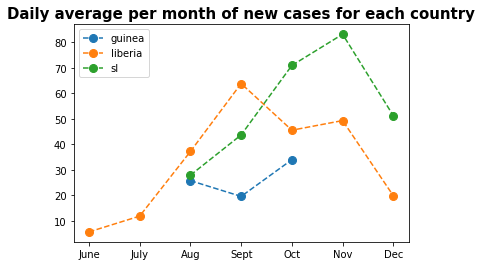

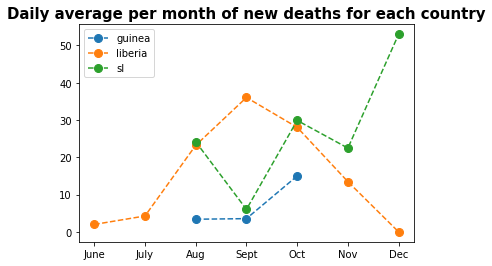

In [102]:
finalframe.Country  = finalframe.Country.astype('category')
groups = finalframe.groupby('Country')

fig, ax1 = plt.subplots()
ax1.margins(0.05)
for name, group in groups:
    ax1.plot(group.Month, group['newcases'], marker='o', linestyle='--', ms=8, label=name)
ax1.legend()
plt.xticks([6,7,8,9,10,11,12],
        ['June','July','Aug','Sept','Oct','Nov','Dec'])

ax1.set_title( 'Daily average per month of new cases for each country', fontsize=15, fontweight='bold')


fig, ax2 = plt.subplots()
ax2.set_title( 'Daily average per month of new deaths for each country', fontsize=15, fontweight='bold')
ax2.margins(0.05)
for name, group in groups:
    ax2.plot(group.Month, group['newdeaths'], marker='o', linestyle='--', ms=8, label=name)
ax2.legend()
plt.xticks([6,7,8,9,10,11,12],
        ['June','July','Aug','Sept','Oct','Nov','Dec'])


plt.show()

## Task 2. RNA Sequences

In the `DATA_FOLDER/microbiome` subdirectory, there are 9 spreadsheets of microbiome data that was acquired from high-throughput RNA sequencing procedures, along with a 10<sup>th</sup> file that describes the content of each. 

Use pandas to import the first 9 spreadsheets into a single `DataFrame`.
Then, add the metadata information from the 10<sup>th</sup> spreadsheet as columns in the combined `DataFrame`.
Make sure that the final `DataFrame` has a unique index and all the `NaN` values have been replaced by the tag `unknown`.

In [103]:
def merge_xls_files(regex):
    all_data = pd.DataFrame()
    list_ = glob.glob(regex)
    for f in list_:
        df = pd.read_excel(f,names = ["MICROBIOME", "DATA"])
        # added the origin. It will be usefull to add the metadata from the 10th spreadshee
        df['BARCODE']=re.search('MID[1-9]', f).group()
        all_data = all_data.append(df)
    return all_data

We import the 9 MID files

In [104]:
mid = merge_xls_files(DATA_FOLDER+'/microbiome/MID*.xls')
mid.head(10)

,MICROBIOME,DATA,BARCODE
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1
1,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1
2,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1
3,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1
5,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1
6,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1
7,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1
8,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,MID1
9,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",4,MID1


We import the metadata and fill the NaN values with unknown

In [105]:
metadata = pd.read_excel(DATA_FOLDER+'/microbiome/metadata.xls')
metadata = metadata.fillna('unknown')
metadata.head(10)

,BARCODE,GROUP,SAMPLE
0,MID1,EXTRACTION CONTROL,unknown
1,MID2,NEC 1,tissue
2,MID3,Control 1,tissue
3,MID4,NEC 2,tissue
4,MID5,Control 2,tissue
5,MID6,NEC 1,stool
6,MID7,Control 1,stool
7,MID8,NEC 2,stool
8,MID9,Control 2,stool


We merge the 2 datasets on the BARCODE

In [106]:
df = pd.DataFrame()
df = pd.merge(mid, metadata,on='BARCODE')
df.head(10)

,MICROBIOME,DATA,BARCODE,GROUP,SAMPLE
0,"Archaea ""Crenarchaeota"" Thermoprotei Desulfuro...",2,MID1,EXTRACTION CONTROL,unknown
1,"Archaea ""Crenarchaeota"" Thermoprotei Sulfoloba...",3,MID1,EXTRACTION CONTROL,unknown
2,"Archaea ""Crenarchaeota"" Thermoprotei Thermopro...",3,MID1,EXTRACTION CONTROL,unknown
3,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",7,MID1,EXTRACTION CONTROL,unknown
4,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,unknown
5,"Archaea ""Euryarchaeota"" ""Methanomicrobia"" Meth...",1,MID1,EXTRACTION CONTROL,unknown
6,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1,EXTRACTION CONTROL,unknown
7,"Archaea ""Euryarchaeota"" Archaeoglobi Archaeogl...",1,MID1,EXTRACTION CONTROL,unknown
8,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",1,MID1,EXTRACTION CONTROL,unknown
9,"Archaea ""Euryarchaeota"" Halobacteria Halobacte...",4,MID1,EXTRACTION CONTROL,unknown


Then we drop the BARCODE colunm because it is not usefull anymore

In [107]:
df = df.drop('BARCODE', 1)

We pivot the table to have MICROBIOME in index and have the GROUP and SAMPLE in colunm. We also replace all the NaN values by the tag unknown.

In [108]:
df = df.pivot_table('DATA','MICROBIOME',['GROUP','SAMPLE'],fill_value='unnkown')
df.head(10)

GROUP                                              Control 1           \
SAMPLE                                                 stool   tissue   
MICROBIOME                                                              
Archaea "Crenarchaeota" Thermoprotei Acidilobal...   unnkown       15   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...         8       14   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   unnkown  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...         2        4   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   unnkown        1   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...         1        1   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   unnkown  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...         1        3   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...         1  unnkown   
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...         5        4   

GROUP                                              Control 2           \
SAMPLE                                                 stool   tissue   
MICROBIOME                                                              
Archaea "Crenarchaeota" Thermoprotei Acidilobal...   unnkown       26   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        16       28   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   unnkown        1   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...         2        5   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   unnkown  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   unnkown        2   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   unnkown  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...         5        2   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...   unnkown        3   
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...         6       14   

GROUP                                              EXTRACTION CONTROL  \
SAMPLE                                                        unknown   
MICROBIOME                                                              
Archaea "Crenarchaeota" Thermoprotei Acidilobal...            unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...            unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...                  2   
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...                  3   

GROUP                                                 NEC 1             NEC 2  \
SAMPLE                                                stool   tissue    stool   
MICROBIOME                                                                      
Archaea "Crenarchaeota" Thermoprotei Acidilobal...  unnkown       14  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unnkown       23  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unnkown  unnkown  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        1        1  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unnkown  unnkown  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unnkown        2  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...  unnkown        1  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        1  unnkown  unnkown   
Archaea "Crenarchaeota" Thermoprotei Desulfuroc...        2        2  unnkown   
Archaea "Crenarchaeota" Thermoprotei Sulfolobal...        5       10  unnkown   

GROUP                                                        
SAMPLE                            

Now we check if the index is unique

In [109]:
df.index.is_unique

True

Alright, everithing is great

## Task 3. Class War in Titanic

Use pandas to import the data file `Data/titanic.xls`. It contains data on all the passengers that travelled on the Titanic.

In [110]:
from IPython.core.display import HTML
HTML(filename=DATA_FOLDER+'/titanic.html')

Name,Labels,Units,Levels,Storage,NAs
pclass,,,3,integer,0
survived,Survived,,,double,0
name,Name,,,character,0
sex,,,2,integer,0
age,Age,Year,,double,263
sibsp,Number of Siblings/Spouses Aboard,,,double,0
parch,Number of Parents/Children Aboard,,,double,0
ticket,Ticket Number,,,character,0
fare,Passenger Fare,British Pound (\243),,double,1
cabin,,,187,integer,0


For each of the following questions state clearly your assumptions and discuss your findings:
1. Describe the *type* and the *value range* of each attribute. Indicate and transform the attributes that can be `Categorical`. 
2. Plot histograms for the *travel class*, *embarkation port*, *sex* and *age* attributes. For the latter one, use *discrete decade intervals*. 
3. Calculate the proportion of passengers by *cabin floor*. Present your results in a *pie chart*.
4. For each *travel class*, calculate the proportion of the passengers that survived. Present your results in *pie charts*.
5. Calculate the proportion of the passengers that survived by *travel class* and *sex*. Present your results in *a single histogram*.
6. Create 2 equally populated *age categories* and calculate survival proportions by *age category*, *travel class* and *sex*. Present your results in a `DataFrame` with unique index.

## Answer :

- ### Create the DataFrame from titanic.xls 

We are using the function `read_excel` from pandas library to import the data

In [111]:
passengers = pd.DataFrame()
passengers = pd.read_excel(DATA_FOLDER + '/titanic.xls')

- ### Describe the type and the value range of each attribute. Indicate and transform the attributes that can be `Categorical`.

To describe the type of each attribute from our dataFrame, we use the `dtypes` function from pandas library. 

It returns dtypes of all attibutes in `passengers`. 

In [112]:
passengers.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

To describe the value range of each attribute from our dataFrame, we use the `describes()` function from pandas library. 

Generate various summary statistics such as mean, min and max, excluding NaN values.

In [113]:
passengers.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


From the observations of the types and values of the attributes of the dataframe `passengers`, we can convert the attibute `body` to an integer. We need to fill the NaN values first.

In [114]:
passengers.body = passengers.body.fillna("0")
passengers.body = passengers.body.astype(int)

We can also transform `sex`, `pclass` and `embarked` atibutes to `Categorical` attibutes. These attibutes can take on only a limited and fixed number of possible values.

Converting these attibutes to a categorical variable will help us save some memory.

In [115]:
passengers.sex  = passengers.sex.astype('category')
passengers.pclass  = passengers.pclass.astype('category')
passengers.embarked = passengers.embarked.astype('category')

- ### Plot histograms for the travel class, embarkation port, sex and age attributes. For the latter one, use discrete decade intervals.

A bar chart is the best way of representing categorical data. Regarding the age of the passengers, we will represent it in a histogram since it gives a discretized display of value frequency which is more suitable to represent non-categorical data.

First, let's define a function to display a bar plot. We will reuse the same function to plot the `travel class`,`embarkation port` and `sex`.

In [116]:
def bar_plot(title, data, n, xlabel, ylabel):
    fig, ax = plt.subplots()
    ax.set_title( title, fontsize=15, fontweight='bold')
    ax.set(xlabel= xlabel)
    ax.set(ylabel= ylabel)
    sns.barplot(data[:n].keys(), data[:n], ax=ax)
    locs, labels = plt.xticks()
    plt.setp(labels,rotation=0) 
    plt.show()

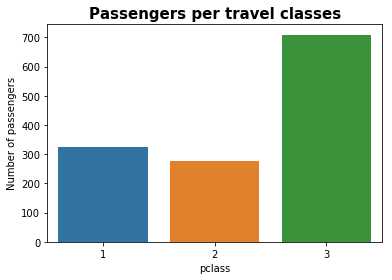

In [117]:
bar_plot('Passengers per travel classes', passengers.groupby('pclass').size(), 
         len(passengers.groupby('pclass')),
            "Class","Number of passengers")

This bar chart tells us that the passengers in class 3 are almost equal to the numbers of passengers travelling in classes 1 and 2 combined.

Now, let's plot a bar chart of the number of passengers having embarked in the 3 differents ports of embarkation

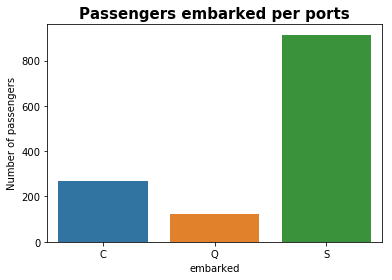

In [118]:
bar_plot('Passengers embarked per ports', passengers.groupby('embarked').size(), 
         len(passengers.groupby('embarked')),
         "Port", "Number of passengers")    

We can clearly see in this bar char that a large portion of the passengers have embarked from the port of Southhampton.


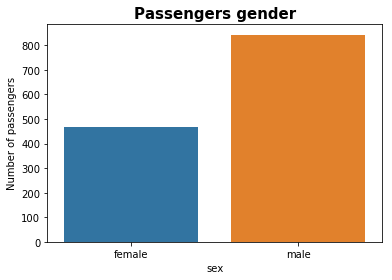

In [119]:
bar_plot('Passengers gender', passengers.groupby('sex').size(), 
         len(passengers.groupby('sex')),
        "Sex", "Number of passengers")

The major portion of the passergers of the Titanic where men.

Now we will plot the histogram of the age of passengers of the Titanic. We have noticed that the values of age < 0 might be faulty considering so tin order to not distort the histogram, we have decided to drop those values. 

In [120]:
passengers.loc[passengers['age']<1,'age'] = None

Now that we have cleaned the data, we can plot a histogram.

We choose bins=40 because we can see from the describtion of the dataframe that the age max is 80 years old, so the intervals will perfectily fit to the edge of the histogram.

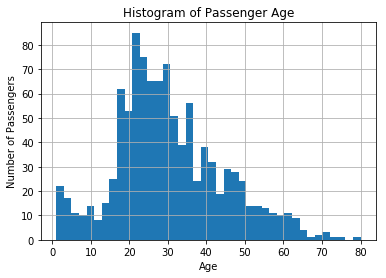

In [121]:
passengers.age.hist(bins=40)
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.title("Histogram of Passenger Age");
plt.show()

This histogram have an almost normal distribution. The statistics show that median is 28 year old, and mean is 30 year old. You can also tell that the distribution is normal when you have similar median and mean.

Besides, the plot show that the ages are distributed around ~ 25.

- ### Calculate the proportion of passengers by cabin floor. Present your results in a pie chart.

The first letter on the cabin number is indicating the floor. First, we wrote a function to convert the cabin to floor.

In [122]:
def string_to_floor(x):
    #We keep just the last letter of the cabin the avoid the exception (e.g. for F G63 we just keep G)
    x=re.sub('[^a-zA-Z]+', '',x)
    x=x[-1]
    
    floor_list=['A','B','C','D','E','F','G']
    
    #If x does not belong to the floor list, we return None
    if (x in  floor_list):
        return x
    else:
        return None

We need to fill the Na values for the function define previously to work properly.

In [123]:
passengers.cabin = passengers.cabin.fillna('Unknown')
passengers.floor = passengers.cabin.apply(lambda x : string_to_floor(x))
passengers.floor = passengers.floor.astype('category')

Plot a pie chart showing the proportion of passengers by cabin floor.

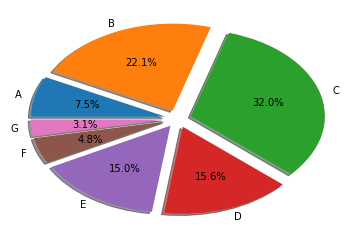

In [124]:
explode = [0.1]*7
labels = passengers.floor.value_counts().sort_index().index.categories

fig1, ax1 = plt.subplots()
ax1.pie(passengers.floor.value_counts().sort_index(), 
        explode=explode,
        labels=labels, 
        autopct='%1.1f%%',
        shadow=True, startangle=180,counterclock=False)

plt.show()

The pie chart clearly shows that half of the passengers' cabin were situated on floors B and C.

- ### For each travel class, calculate the proportion of the passengers that survived. Present your results in pie charts.

In [125]:
survivors_by_class = passengers[['pclass','survived']].groupby(['pclass']).mean()

survivors_by_class['died']= 1-survivors_by_class['survived']
#survivors_by_class.pivot_table(survivors_by_class,['survived','died'],'pclass')
survivors_by_class = survivors_by_class.transpose()
survivors_by_class

pclass,1,2,3
survived,0.619195,0.429603,0.255289
died,0.380805,0.570397,0.744711


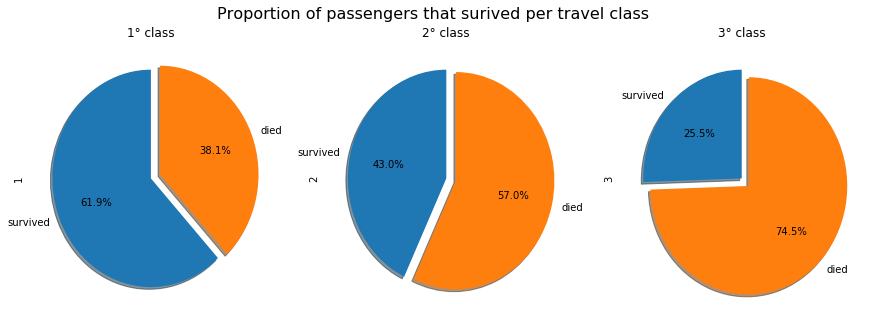

In [126]:
f, axes = plt.subplots(1,3, figsize=(15,5))
for ax, col in zip(axes, survivors_by_class.columns):
    survivors_by_class[col].plot(kind='pie',explode = (0, 0.1),startangle=90, shadow = True,autopct = '%1.1f%%',title=str(col)+"° class",  ax=ax, fontsize=10)
f.suptitle('Proportion of passengers that surived per travel class', fontsize=16)
plt.show()

- ### Calculate the proportion of the passengers that survived by travel class and sex. Present your results in a single histogram.

In [127]:
survivor_by_travel_and_sex = passengers[['pclass','sex','survived']].groupby(['pclass','sex']).mean().reset_index()
survivor_by_travel_and_sex['survived'] = survivor_by_travel_and_sex['survived']*100
survivor_by_travel_and_sex

,pclass,sex,survived
0,1,female,96.527778
1,1,male,34.078212
2,2,female,88.679245
3,2,male,14.619883
4,3,female,49.074074
5,3,male,15.212982


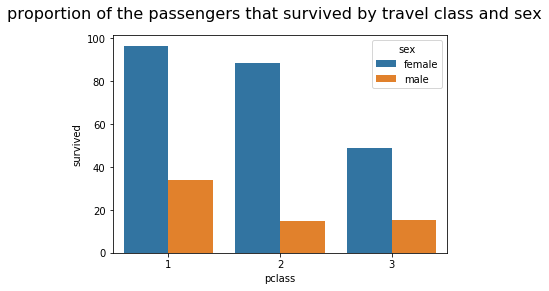

In [128]:
sns.barplot(x="pclass", y="survived", hue="sex", data=survivor_by_travel_and_sex);
plt.suptitle('proportion of the passengers that survived by travel class and sex', fontsize=16)
plt.show()

This histogram show that the phrase "Women and children first" actually worked for the Titanic. More than twice as many women as men have survived.
Almost 100% of the women travelling in 1st class survived the sinking, 90% in 2nd class and 50% in 3rd class.
The mortality is much higher for the 3rd class due to the fact that the cabins were in the lowest floors of the Titanic. 

- ### Create 2 equally populated age categories and calculate survival proportions by age category, travel class and sex. Present your results in a DataFrame with unique index

In [129]:
median_age=passengers.age.median()

def old_or_young(age,median_age):
    if age <median_age:
        return 'young'
    elif  age >= median_age:
        return 'old'
    else:
        return None


passengers['age_category']= passengers.age.apply(lambda x : old_or_young(x,median_age))
passengers.age_category  = passengers.age_category.astype('category')

In [130]:
survivor_by_travel_and_sex_and_age = passengers[['pclass','age_category','sex','survived']].groupby(['pclass','age_category','sex']).mean().reset_index()
survivor_by_travel_and_sex_and_age['survived'] = survivor_by_travel_and_sex_and_age['survived']*100
survivor_by_travel_and_sex_and_age

,pclass,age_category,sex,survived
0,1,old,female,96.774194
1,1,old,male,30.894309
2,1,young,female,95.000000
3,1,young,male,51.851852
4,2,old,female,88.461538
5,2,old,male,7.777778
6,2,young,female,90.000000
7,2,young,male,20.000000
8,3,old,female,34.782609
9,3,old,male,13.043478


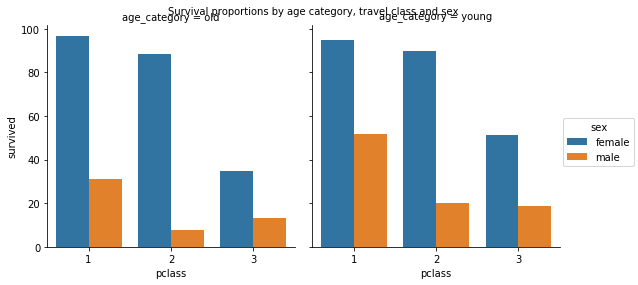

In [131]:
sns.factorplot(x="pclass", y="survived", hue="sex",col="age_category",kind='bar', data=survivor_by_travel_and_sex_and_age);
plt.suptitle('Survival proportions by age category, travel class and sex', fontsize=10)
plt.show()

In [132]:
survivor_by_travel_and_sex_and_age.index.is_unique

True